## Exercise 1

Plot the cosmological distances (luminosity, angular diameter distance, comoving distance) using the guiding code below. Compare the result to the Plots that using distance functions calling from CLASS.

##### Luminosity distance

\begin{equation}
d_{L} = \frac{(1+z)c}{H_{0}}\int_{0}^{z} \frac{dz'}{E(z')} 
\end{equation}

##### Angular diameter distance

\begin{equation}
d_{A} = \frac{d_L}{(1+z)^2} 
\end{equation}

##### Comoving distance

\begin{equation}
d_\text{com} = \frac{c}{H_{0}}\int_{0}^{z} \frac{dz'}{E(z')} 
\end{equation}

##### Guiding solution

In [58]:
# initilisation

%matplotlib inline
import numpy as np
import scipy.constants as const 
from scipy.integrate import quad # Gaussian quadrature method for numerical integration
import matplotlib.pyplot as plt
import pandas as pd     # for handling of data files

font = {'size'   : 12, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [5]:
# input parameter
O_cdm = 0.262   # cold dark matter density parameter
O_b = 0.048     # baryon density parameter
O_r = 9.096e-5    # radiation (photon + ultra relativistic species)
O_k = 0.

# Define E(z) function
def E(z, params):
    O_cdm, O_b, O_r, O_k = params
    # ---
    E2 = (O_cdm + O_b)*(1+z)**3 + O_r*(1+z)**4 + O_k*(1+z)**2 + (1 - O_b - O_cdm - O_r - O_k)
    return np.sqrt(E2)
    

In [6]:
# perform calculation (define all needed stuff, otherwise you will get error in compiling)

## Luminosity distance
def dL(zs, params):
    result = # put your code here
    return result

## Angular diameter distance
def dA(zs, params):
    return dL(zs,params)/(1 + zs**2)

## Comoving distance
def dcom(zs, params):
    return # your code 

In [ ]:
# Test the function
# params = [O_cdm,O_b,O_r]
# Your dL

In [ ]:
# Perform the plot (define all needed stuff, otherwise you will get error in compiling)

# 1. Define an array for the redshift z
# Your code

# 2. Put z array in dL an make a plot

plt.plot(z_array, dL(z_array, params))
plt.xlim(0,4)
plt.ylim(0,4)


In [ ]:

# Goal: to show all of the distances in two models: EdS and LCDM with O_m = 0.31

# make a loop running over all distances

col = ['r','b','g'] # color: red, blue, green

fig, ax = plt.subplots(figsize=(4, 6))

## --- construct z_arr ---
z_arr = np.linspace(0,10)

dL_arr = dL(z_arr, params)
dA_arr = # your code
dcom_arr = # your code

distances = [dL_arr, dA_arr, dcom_arr]

for fn in distances:
    plt.loglog(z_arr, fn)

## Exercise 2

Plot the three distances using the Python wrapper for CLASS, comparing your code in the exercise 1

##### Guiding solution

In [10]:
## Import CLASS
from classy import Class

In [21]:
cosmo = Class()
cosmo.set({
            'T_cmb': 2.7255,
            'H0': 67.81,
            'Omega_b': 0.048,
            'Omega_cdm': 0.262,
            # 'background_verbose': 1  # Show some of the cosmological calculation
           }
          )
cosmo.compute()

#### About unit

CLASS will calculate the Hubble at a redshift as in the unit of $\mathrm{Mpc}^{-1}$.
So, in order to obtain the unit of $H(z)$ in $\mathrm{km\;s}^{-1}\mathrm{Mpc}^{-1}$, 
we multiply $H(z)$ with the speed of light (in the unit of $\textrm{km/s}$). 

In [22]:

c_in_kmps = const.c/1000 # speed of light in vacuum in km/s

H0_1_over_Mpc = cosmo.Hubble(0) # call Hubble constant (in unit of Mpc^{-1}) at redshift 0 

# -----------------------------------------------
# Note: To recover the Hubble constant in km/s/Mpc,
# multiplying H_1_over_Mpc with the speed of light (km/s)
H0 = H0_1_over_Mpc*c_in_kmps 

# -----------------------------------------------
c_over_H = c_in_kmps/H0_1_over_Mpc # c/H0 in REAL Mpc

##### Get background values

In [23]:
#------------------------------------------------
# get list of background quanties
bg = cosmo.get_background()
# bg.keys() to view aviable values

In [26]:
z_array = bg['z']
dL_array = bg['lum. dist.']
dA_array = bg['ang.diam.dist.']
dcom_array = bg['comov. dist.']

(0.0, 4.0)

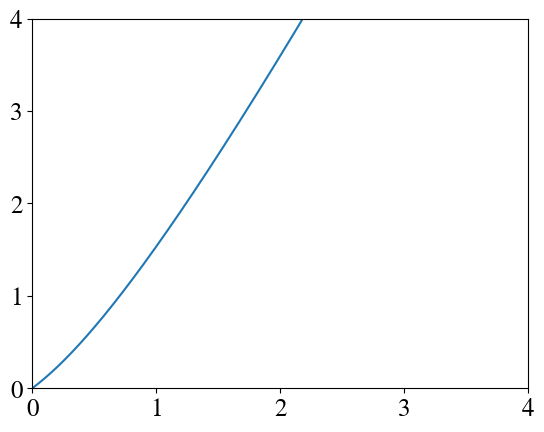

In [38]:

plt.plot(z_array, dL_array*H0_1_over_Mpc)
plt.xlim(0,4)
plt.ylim(0,4)

## Exercise 3

Define distance modulus function below (call the luminosity-distance function from CLASS). Plot with three models, $\Omega_m=0.1$, $\Omega_m=0.3$ and $\Omega_m=0.9$ together with the SN Ia observations from the Pantheon+SH0ES

#### Distance modulus

\begin{equation}
    \mu(z) = 5\log_{10}\left(\frac{d_L(z)}{1~{\rm Mpc}}\right) + 25
\end{equation}

In [ ]:
# define distance modulus

# Try to put your code here
def mu(z,params):
    return # your code

##### Import Panteon+SH0ES data

In [29]:
# using pandas

df = pd.read_csv('data/Pantheon+SH0ES.dat',delimiter = ' ') # read data in the data file

# this line is to construct dictionary using the first row in the data file as keys.  
SNIa_dict = {col: np.array(df[col].to_numpy()) for col in df.columns}
# SNIa_dict.keys()


In [30]:
z_data = SNIa_dict['zCMB']
mu_data = SNIa_dict['MU_SH0ES']
mu_err = SNIa_dict['MU_SH0ES_ERR_DIAG']

In [ ]:
# Plot SNIa data againts theoretical curves
fig, ax = plt.subplots()
ax.errorbar(z_data, mu_data, yerr=mu_err, 
             fmt='.', color='k', ecolor='grey', 
             elinewidth=0.5,ms=1)
ax.plot(z_arr, mu_array)